# SMC2017: Exercise set III

## Setup

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

## III.1 Metropolis-Hastings

Distribution of interest
$$
\pi(x) \propto \sin^2(x) \exp(-|x|) \quad(x \in \mathbb{R})
$$
This distribution is normalized by dividing through 0.8.

Use Gaussian random walk as proposal, i.e. $q(x\,|\,x') = N(x\,|\,x',\,\sigma)$. Different values of $\sigma$ should be tried.

In [6]:
def metropolis_hastings(M, sigma=1):
    x = np.zeros((M + 1,))
    # Initial state
    x[0] = 1
    # Iterate the chain
    for i in range(M):
        # Sample a new value
        xp = stats.norm.rvs(x[i], sigma, 1)
        # Sample to be compared to the acceptance probability
        u = stats.uniform.rvs()
        # Terms in the second part of the acceptance probability
        # Proposal is symmetric, so terms containing the proposal will
        # cancel each other out
        rhs = np.power(np.sin(xp), 2) * np.exp(-np.abs(xp)) / \
            (np.power(np.sin(x[i]), 2) * np.exp(-np.abs(x[i])))
        # Acceptance probability
        alpha = min(1, rhs)
        # Set next state depending on acceptance probability
        if u <= alpha:
            x[i + 1] = xp
        else:
            x[i + 1] = x[i]
            
    return x

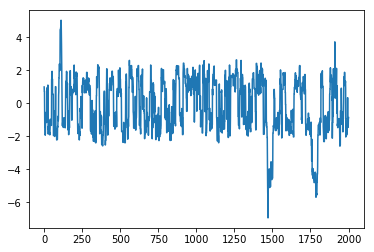

In [22]:
xs = metropolis_hastings(2000, sigma=1)

fig, ax = plt.subplots()
ax.plot(xs)

The sampling at least seems to be bounded in some way and seems to explore a sine curve of some type.

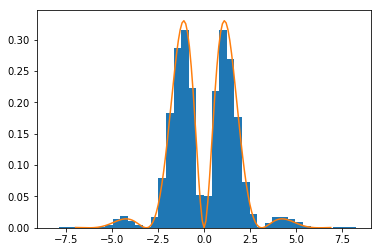

In [16]:
xs = metropolis_hastings(50000)

# Remove burn-in and use the rest of the samples for a histogram
burnin = 1000
fig, ax = plt.subplots()
ax.hist(xs[burnin:], normed=True, bins=40)

# Overlay the actual distribution
x_grid = np.arange(-7, 7, 0.1)
pdf = 5. / 4. * np.power(np.sin(x_grid), 2) * np.exp(-np.abs(x_grid))
ax.plot(x_grid, pdf)

Try a different value of $\sigma$.

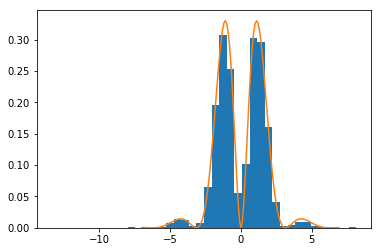

In [17]:
xs = metropolis_hastings(50000, sigma=2)

# Remove burn-in and use the rest of the samples for a histogram
burnin = 1000
fig, ax = plt.subplots()
ax.hist(xs[burnin:], normed=True, bins=40)

# Overlay the actual distribution
x_grid = np.arange(-7, 7, 0.1)
pdf = 5. / 4. * np.power(np.sin(x_grid), 2) * np.exp(-np.abs(x_grid))
ax.plot(x_grid, pdf)

## III.2 Gibbs sampling

Target distribution is
$$
\pi(x) = N\left(x\,\big|\,\begin{pmatrix} 7 \\ 3 \end{pmatrix},\,
\begin{pmatrix} 0.3 & 0.1 \\ 0.1 & 1 \end{pmatrix}\right)
$$
and Gibbs sampling for each component should be used. 

Starting point is supposed to be $(0, 0)$.

The two marginal distributions are
$$
\begin{align}
\pi(x^1\,|\,x^2[i - 1]) &= N\left(x^1\,\big|\,
7 + \frac{0.1}{1} (x^2[i - 1] - 3), 0.3 - \frac{0.1^2}{1}\right) \\ 
&= N\left(x^1\,\big|\,6.7 + 0.1 \cdot x^2[i - 1], 0.29\right)
\end{align}
$$
and
$$
\begin{align}
\pi(x^2\,|\,x^1[i]) &= N\left(x^2\,\big|\,
3 + \frac{0.1}{0.3} (x^1[i] - 7), 1 - \frac{0.1^2}{0.3}\right) \\ 
&= N\left(x^1\,\big|\,\frac{2}{3} + \frac{1}{3} \cdot x^1[i], \frac{29}{30}\right)
\end{align}
$$

In [24]:
def gibbs_sampler(M):
    # Array for storing results
    xs = np.zeros((M + 1, 2))
    # Initial state
    xs[0, :] = np.array([0, 0])
    # Iterate the Markov chain
    for i in range(1, M + 1):
        # Sample the first component
        xs[i, 0] = stats.norm.rvs(6.7 + 0.1 * xs[i - 1, 1], 0.29, 1)
        # Sample the second component
        xs[i, 1] = stats.norm.rvs(2. / 3. + 1. / 3. * xs[i, 0], 29. / 30.)
        
    return xs

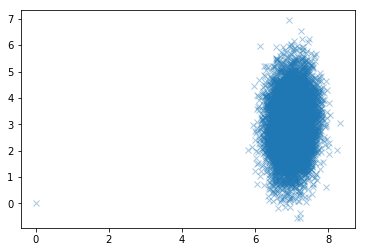

In [32]:
xs = gibbs_sampler(10000)

fig, ax = plt.subplots()
ax.plot(xs[:, 0], xs[:, 1], 'x', alpha=0.4)